In [6]:
# Load the os library
import os

# Load the request module
import urllib.request

# Import SSL which we need to setup for talking to the HTTPS server
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Create a directory
try: 
    os.mkdir('img_align_celeba')

    # Now perform the following 100 times:
    for img_i in range(1, 101):

        # create a string using the current loop counter
        f = '000%03d.jpg' % img_i

        # and get the url with that string appended the end
        url = 'https://s3.amazonaws.com/cadl/celeb-align/' + f

        # We'll print this out to the console so we can see how far we've gone
        print(url, end='\r')

        # And now download the url to a location inside our new directory
        urllib.request.urlretrieve(url, os.path.join('img_align_celeba', f))
except:
    #os.rm('img_align_celeba')
    print("You may need to delete the existing 'img_align_celeba' folder in your directory")

You may need to delete the existing 'img_align_celeba' folder in your directory


In [7]:
files = os.listdir('img_align_celeba')# img.<tab>
import matplotlib.pyplot as plt
import numpy as np

print(os.path.join('img_align_celeba', files[0]))
plt.imread(os.path.join('img_align_celeba', files[0]))

files = [os.path.join('img_align_celeba', file_i)
 for file_i in os.listdir('img_align_celeba')
 if '.jpg' in file_i]

# There should be 100 files, with the last one being number 99

#imgs = [plt.imread(files[file_i])
#        for file_i in range(100)]
#plt.imshow(imgs[24])

img_align_celeba\000001.jpg


C:\Users\Done\AppData\Local\Temp\ipykernel_11272\1915403962.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return -np.log(1/((1 + change)/257) - 1)


Text(0.5, 1.0, 'blue')

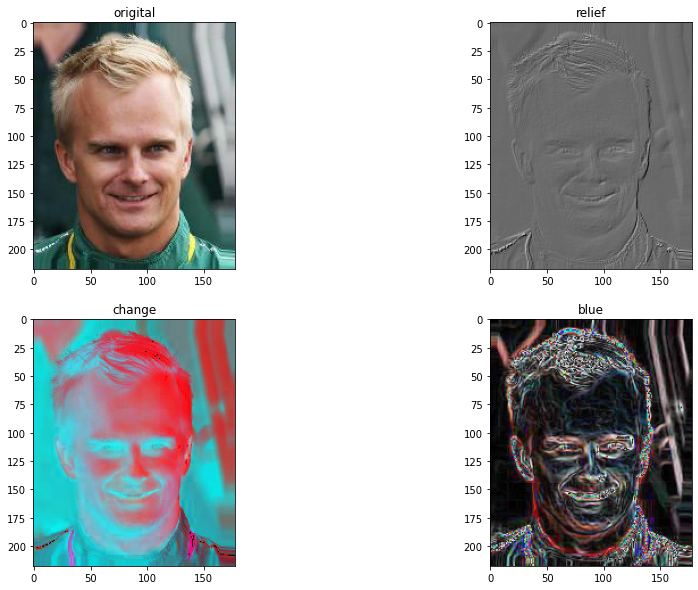

In [26]:
img = plt.imread(files[12])

#data=plt.imread("img_align_celeba/000015.jpg")
#t=np.dot(img,[0.299,0.587,0.114])

relief=img.copy()
kernel=np.array([[-1,0,0],[0,1,0],[0,0,0]])
t=np.dot(img,[0.299,0.587,0.114])
relieff=np.empty_like(t)
height,width=t.shape[0],t.shape[1]
t=np.pad(t,pad_width=1,mode="constant",constant_values=0)
for row in range(height):
    for col in range(width):
        relieff[row][col]=np.sum( t[row:row+kernel.shape[0],col:col+kernel.shape[1]]*kernel)

        
change=img.copy()
def do_normalise(change):
    return -np.log(1/((1 + change)/257) - 1)
def undo_normalise(change):
    return (1/(np.exp(-change) + 1) * 257 - 1).astype("uint8")
def rotation_matrix(theta):
    return np.c_[[1,0,0],[0,np.cos(theta),-np.sin(theta)],[0,np.sin(theta),np.cos(theta)]]
change_normed = do_normalise(edge)
change_rotated = np.einsum("ijk,lk->ijl", change_normed, rotation_matrix(np.pi))
change2 = undo_normalise(change_rotated)


from scipy.signal import convolve2d
edge=img.copy()
sobel_x = np.c_[[-1,0,1],[-2,0,2],[-1,0,1]]
sobel_y = np.c_[[1,2,1],[0,0,0],[-1,-2,-1]]
ims = []
for d in range(3):
    sx = convolve2d(edge[:,:,d], sobel_x, mode="same", boundary="symm")
    sy = convolve2d(edge[:,:,d], sobel_y, mode="same", boundary="symm")
    ims.append(np.sqrt(sx*sx + sy*sy))
edge2 = np.stack(ims, axis=2).astype("uint8")


figure,ax=plt.subplots(2,2)
figure.set_size_inches(15,10)
ax[0,0].imshow(img)
ax[0,0].set_title("origital")
ax[0,1].imshow(relieff,cmap="gray")
ax[0,1].set_title("relief")
ax[1,0].imshow(change2)
ax[1,0].set_title("change")
ax[1,1].imshow(edge2)
ax[1,1].set_title("blue")

